# Black Friday - Prediction

### 1.0 Importing required libraries and Data Exploration

In [5]:
# Basic packages
import os
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot settings
plt.style.use('ggplot') # URL for style sheets (https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

# warning settings
import warnings
warnings.filterwarnings("ignore")

In [11]:
from support.bfdata import getcsv_data
dataset = getcsv_data()
# Checking for null values in the columns
dataset.isnull().sum()

Train dataframe :- (550068, 13)
Test dataframe :- (233599, 12)
Combined dataset dataframe :- (783667, 13)


User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
source                             0
dtype: int64

__Observation__:
There are significant missing values in 3 columns (Product_Category_2, Product_Category_3 and Purchase)

In [9]:
# Checking details from the columns with 'numeric' datatype
dataset.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [10]:
# Obtaining number of unique values in each column
dataset.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               18
Product_Category_3               16
Purchase                      18106
source                            2
dtype: int64

We can see that most of the columns are with categorical data, either expressed in numericals or strings

In [14]:
#Filter categorical variables
categorical_columns = [x for x in dataset.dtypes.index if dataset.dtypes[x]=='object']

# Adding other categorical variables indicated as numerics
categorical_columns.extend(['Occupation'])

# Droping Identifier values from the list
categorical_columns = [x for x in categorical_columns if x not in ['Product_ID','source']]

# Print frequency of categories
for col in categorical_columns:
    print ('Frequency (Count) of Categories for varible : ', col)
    print (dataset[col].value_counts())
    print('---------------------------------------------------')

Frequency (Count) of Categories for varible :  Gender
M    590031
F    193636
Name: Gender, dtype: int64
---------------------------------------------------
Frequency (Count) of Categories for varible :  Age
26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64
---------------------------------------------------
Frequency (Count) of Categories for varible :  City_Category
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64
---------------------------------------------------
Frequency (Count) of Categories for varible :  Stay_In_Current_City_Years
1     276425
2     145427
3     135428
4+    120671
0     105716
Name: Stay_In_Current_City_Years, dtype: int64
---------------------------------------------------
Frequency (Count) of Categories for varible :  Occupation
4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     3

### 1.1 Hypothesis

On observations of the column headers and the values the following hypothesis can be carried out

__User_ID__ : <br>
Identification values which links to the demographics of the person like (Gender, Age, Marital Status, Occupation, City Category and years in city) 
<br>

__Product_ID__ : <br>
Identification values which links other sub categories Product_Category_1, Product_Category_2 and Product_Category_3
<br>

__Gender__ : (Male / Female) <br>
Generally females shop more than male. However the User_ID maybe linked with the male who would pay for the purchase
<br>

__Age__ : (Range between 0 to 55+) <br>
Teenagers and middle aged group people tend to make use of the BlackFriday sale
<br>

__Marital Status__ : (Married / Un-married) <br>
Un-married people spend more during the sale season compared to those married
<br>

__Occupation__ : (Range between 0 to 20) <br>
People in Managerial and above position Purchase more compared to mid-level and associate positions
<br>

__City Category__ : (Code A, B, C) <br>
People living in metros spend more during sale compared to less populated cities

__Stay in City__ : (Range between 0 to 4+) <br>
As people stay more in a particular city and based on experience on various aspects in the mart, people who fancy few of their favorite marts may visit them during the sale season.

__Product Category__ : (1, 2, & 3) <br>
Links to Sub categories of Product_ID


### 2. EDA
> Imputing missing values and Treating outliers

In [18]:
# Checking whether Product_ID is related to other Product Category columns
tab1 = dataset.groupby(['Product_ID'])['Product_Category_1','Product_Category_2','Product_Category_3'].mean().head(10)
# exporting to csv file storing the result as table
tab1.to_csv('results/tab1.csv', index=False)
tab1

,Product_Category_1,Product_Category_2,Product_Category_3
Product_ID,,,
P00000142,3,4.0,5.0
P00000242,2,4.0,9.0
P00000342,5,14.0,NaN
P00000442,5,8.0,NaN
P00000542,5,NaN,NaN
P00000642,1,6.0,16.0
P00000742,5,14.0,NaN
P00000842,2,4.0,NaN
P00000942,1,NaN,NaN


__Observation__: <br>
From the above, we can make out that Product_Category2 and Product_Category3 are __not related__ to the Product_ID

In [19]:
# Obtaining list of booleans specifying Product_Category_2 and Product_Category_3 missing  values
miss_Prod2_rows = dataset['Product_Category_2'].isnull()  
miss_Prod3_rows = dataset['Product_Category_3'].isnull()
# Impute 0s in place of NaN in columns Product_Category_2 and Product_Category_3
dataset.loc[miss_Prod2_rows,'Product_Category_2'] = 0
dataset.loc[miss_Prod3_rows,'Product_Category_3'] = 0

In [22]:
# Combining 3 Product category columns into 1 maseter category column
dataset['Master_Product_Category']=dataset['Product_Category_1'].astype(str)+dataset['Product_Category_2'].astype(int).astype(str)+dataset['Product_Category_3'].astype(int).astype(str)

tab2= dataset[['Product_ID','Product_Category_1','Product_Category_2','Product_Category_3','Master_Product_Category']].head(10)
tab2.to_csv('results/tab2.csv', index=False)
tab2

,Product_ID,Product_Category_1,Product_Category_2,Product_Category_3,Master_Product_Category
0,P00069042,3,0.0,0.0,300
1,P00248942,1,6.0,14.0,1614
2,P00087842,12,0.0,0.0,1200
3,P00085442,12,14.0,0.0,12140
4,P00285442,8,0.0,0.0,800
5,P00193542,1,2.0,0.0,120
6,P00184942,1,8.0,17.0,1817
7,P00346142,1,15.0,0.0,1150
8,P0097242,1,16.0,0.0,1160
9,P00274942,8,0.0,0.0,800


In [23]:
dataset.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
source                             0
Master_Product_Category            0
dtype: int64

__Observation__ : <br>

Purchase column:
>There are quire a few missing values in Purchase (dependent varaible) column. <br>
It is advisable to impute as many values in the dependent variable column to obtain a good model.<br>
Hence it is advisable to find whether there is *correlation between the Product_ID or newly created Master Product Category column* and Purchase column.

In [24]:
# Check Purchase values from the grouping by the newly created Master_Product_Category column
categ_mean = dataset.groupby(['Master_Product_Category'])['Purchase'].mean()
categ_mean.isnull().sum()

0

In [25]:
# Check Purchase values from the grouping by the Product_ID column
purch_mean_prodID = dataset.groupby(['Product_ID'])['Purchase'].mean()
purch_mean_prodID.isnull().sum()

46

As the missing values in Purchase column has corresponding Master category values, <br>
incorporating the mean value into the Purchase column based on the Master Category column is advisable.

In [26]:
# Obtain missing Purchase values
miss_Purch_rows = dataset['Purchase'].isnull()

# Impute mean Purchase value based on Master_Product_Category column
dataset.loc[miss_Purch_rows,'Purchase'] = dataset.loc[miss_Purch_rows,'Master_Product_Category'].apply(lambda x: categ_mean.loc[x])

print ('Null values in Purchase column before imputation : ' , miss_Purch_rows.sum())
print ('Results after imputation : ', dataset['Purchase'].isnull().sum())

Null values in Purchase column before imputation :  233599
Results after imputation :  0


In [27]:
list(dataset.columns.values)

['User_ID',
 'Product_ID',
 'Gender',
 'Age',
 'Occupation',
 'City_Category',
 'Stay_In_Current_City_Years',
 'Marital_Status',
 'Product_Category_1',
 'Product_Category_2',
 'Product_Category_3',
 'Purchase',
 'source',
 'Master_Product_Category']

In [32]:
# Rearranging the columns
dataset = dataset[['User_ID','Product_ID', 'Gender','Age','Occupation', 'City_Category','Stay_In_Current_City_Years',
                   'Marital_Status',  'Master_Product_Category', 'Purchase', 'source']]

# Converting Master_Product_Category datatype object to integer
dataset['Master_Product_Category'] = dataset['Master_Product_Category'].astype(str).astype(int)

#Rename Gender to more intuitive categories:
dataset['Gender'] = dataset['Gender'].map({'F':'Female','M':'Male'})

#Rename them to more intuitive categories:
dataset['Marital_Status'] = dataset['Marital_Status'].map({0:'Un-Married', 1:'Married'})

In [33]:
# Re-look at the unique values of other 'demographical' columns pertaining to the customer
print('Age :' ,sorted(dataset.Age.unique()), sep='\n')
print(sep='\n\n')
print('City_Category :', sorted(dataset.City_Category.unique()), sep='\n')
print(sep='\n\n')
print('Stay_In_Current_City_Years :', sorted(dataset.Stay_In_Current_City_Years.unique()), sep='\n')
print(sep='\n\n')

Age :
['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

City_Category :
['A', 'B', 'C']

Stay_In_Current_City_Years :
['0', '1', '2', '3', '4+']



In [34]:
# Replacing '4+' years of with numerical number 4 
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].replace('4+', 4)

# Converting Stay_In_Current_City_Years data type to integer
dataset['Stay_In_Current_City_Years'] = dataset['Stay_In_Current_City_Years'].astype(str).astype(int)

print('Occupation :', sorted(dataset.Occupation.unique()))

Occupation : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


__Point to ponder__:

We can observe that there are __(21) categories__ of Occupation of customers. <br>
Based on the country that the data has been taken, there might be standard coding system for categorising occupation, which is been indicated in the dataset.

However, based on International Standard Classification of Occupations, there are (10) main categories
1. Managers
2. Professional
3. Technicians and associate professionals
4. Clerical support workers
5. Service and sales workers
6. Skilled agricultural, forestry and fishery workers
7. Craft and related trades workers
8. Plant and machine operators, and assemblers
9. Elementary occupations
10. Armed forces occupations

(Source : Wikipedia)

### 3. Visualization

Visualization of categorical variables  - __BY COUNT__

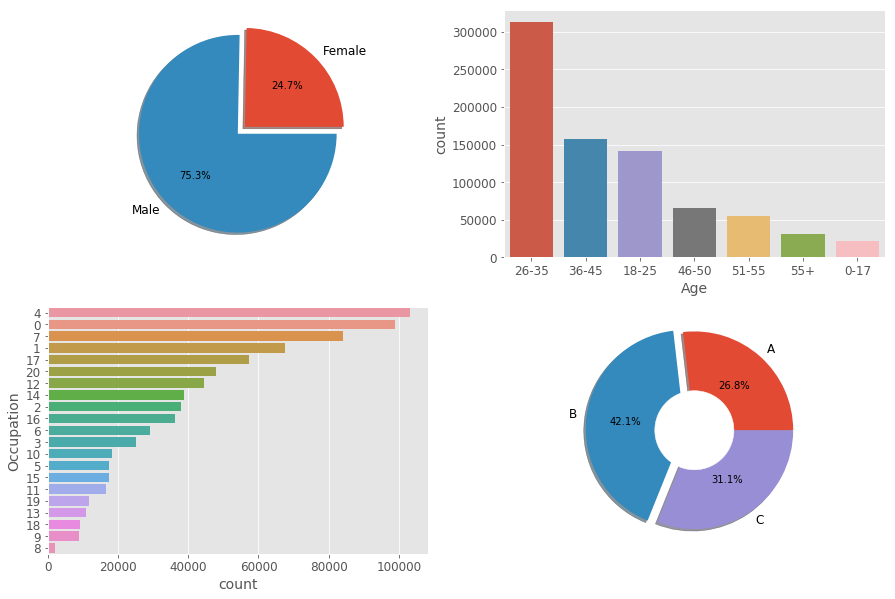

In [35]:
plt.figure(figsize=(15,10))

# Pie chart for gender distribution
plt.subplot(2,2,1)
gender_count = [dataset.Gender[dataset['Gender']=='Female'].count(),
                dataset.Gender[dataset['Gender']=='Male'].count()]
gender_lab = dataset.Gender.unique()
expl = (0.1,0)
plt.pie(gender_count, labels=gender_lab, explode=expl, shadow=True , autopct='%1.1f%%');

# Bar chart for Age
plt.subplot(2,2,2)
ordr =dataset.groupby(["Age"]).count().sort_values(by='Purchase',ascending=False).index
sns.countplot(dataset['Age'], label=True, order=ordr)

# Bar chart for Occupation
plt.subplot(2,2,3)
ordr1 =dataset.groupby(["Occupation"]).count().sort_values(by='Purchase',ascending=False).index
sns.countplot(y=dataset['Occupation'], label=True, order=ordr1)

# Donut chart for City Category
plt.subplot(2,2,4)
city_group = dataset.groupby(["City_Category"])
city_count = city_group[['Purchase']].count().values.tolist()
city_lab = dataset.groupby(["City_Category"]).count().index.values
my_circle = plt.Circle( (0,0), 0.4, color='white')
expl1 = (0,0.1,0)
plt.pie(city_count, labels=city_lab,explode=expl1, shadow=True, autopct='%1.1f%%')
plt.gcf().gca().add_artist(my_circle)


plt.show()

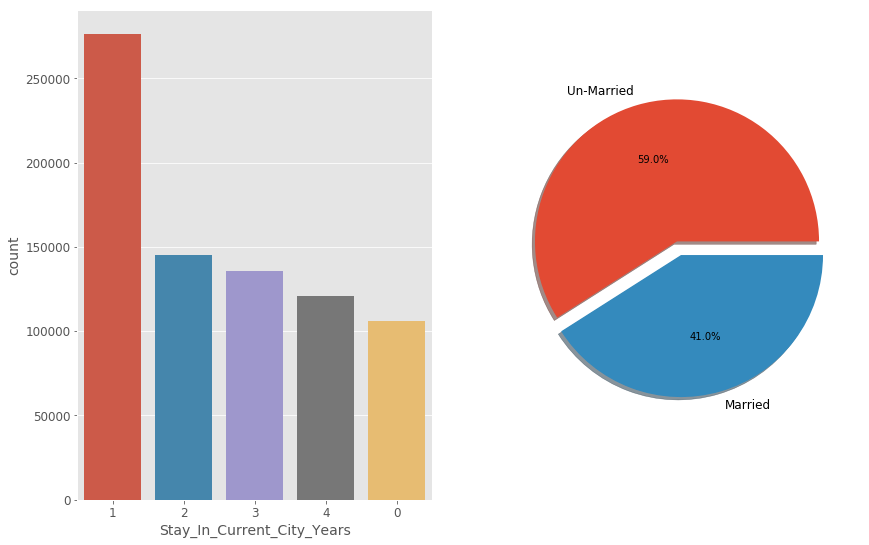

In [36]:
plt.figure(figsize=(14,9))

plt.subplot(1,2,1)
ordr2 =dataset.groupby(["Stay_In_Current_City_Years"]).count().sort_values(by='Purchase',ascending=False).index
sns.countplot(dataset['Stay_In_Current_City_Years'], label=True, order=ordr2)

plt.subplot(1,2,2)
ms_count = [dataset.Marital_Status[dataset['Marital_Status']=='Un-Married'].count(),
                dataset.Marital_Status[dataset['Marital_Status']=='Married'].count()]
ms_lab = dataset.Marital_Status.unique()
expl = (0.1,0)
plt.pie(ms_count, labels=ms_lab, explode=expl, shadow=True , autopct='%1.1f%%');

plt.show()

More Insight from Gender and Age

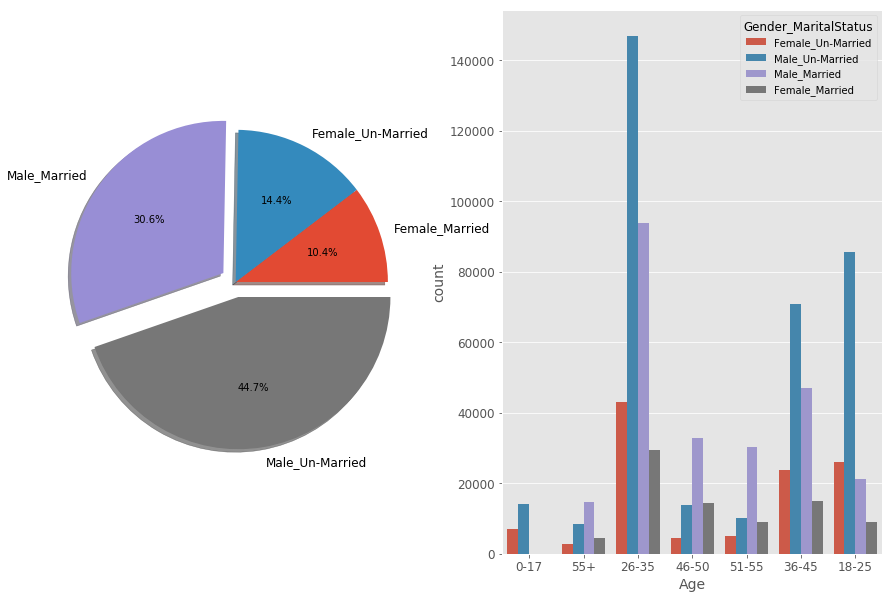

In [38]:
#Creating new column in the dataset 
dataset['Gender_MaritalStatus'] = dataset.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)


plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
group_g_ms = dataset.groupby(["Gender_MaritalStatus"])
count_ms = group_g_ms[['Purchase']].count().values.tolist()
lab1 = dataset.groupby(["Gender_MaritalStatus"]).count().index.values
expl2 = (0,0,0.1,0.1)

plt.pie(count_ms, labels=lab1,explode=expl2, shadow=True, autopct='%1.1f%%')

plt.subplot(1,2,2)
sns.countplot(dataset['Age'],hue=dataset['Gender_MaritalStatus'])

plt.show()

__Observations__ : 
1. __Un-married males__ between the age group of __26-35__ are major customers of the store.
2. Majority customers are from the __City category B (42%) and C (31%)__
4. Customers with __Occupation__ code __4 (13%), 0 (12.7%) and 7(10.8%)__ are more compared to others
5. It can be observed that, as customers __who are new__ in the the current city, tend to purchase more from the store.

Visualization of categorical variables  - __BY AVERAGE PURCHASE__

<Figure size 576x432 with 0 Axes>

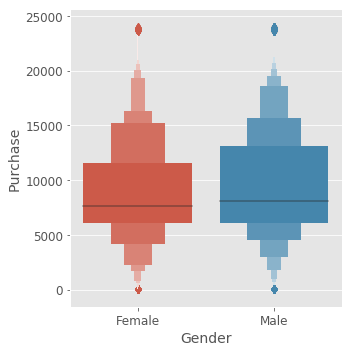

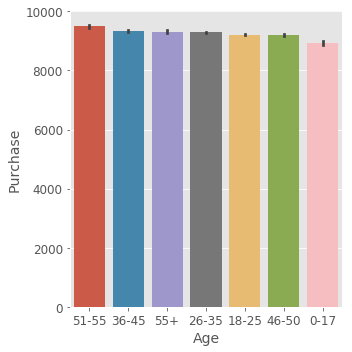

In [39]:
plt.figure(figsize=(8,6))


sns.catplot(x='Gender', y='Purchase', data=dataset, kind='boxen')

ordr_age =dataset.groupby(["Age"]).mean().sort_values(by='Purchase',ascending=False).index
sns.catplot(x='Age', y='Purchase', order=ordr_age, data=dataset, kind='bar')

plt.show()

<Figure size 576x432 with 0 Axes>

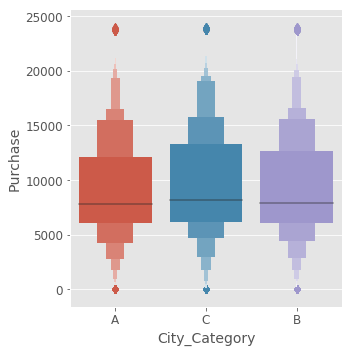

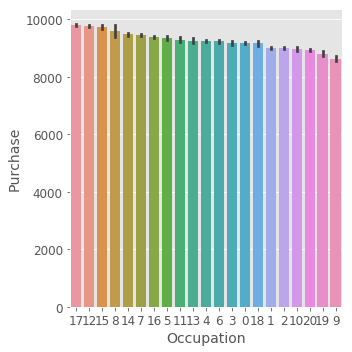

In [40]:
plt.figure(figsize=(8,6))

sns.catplot(x='City_Category', y='Purchase', data=dataset, kind='boxen')

ordr_occ =dataset.groupby(["Occupation"]).mean().sort_values(by='Purchase',ascending=False).index
sns.catplot(x='Occupation', y='Purchase', order=ordr_occ, data=dataset, kind='bar')

plt.show()

__Observations__ : 
1. __Males__ spend more than females
2. Age factor : Customers who are __above 35 years__ of age spend more. 
3. __Occupation codes 17, 12 and 15__ appears to be earning more and accordingly spend more 
4. People living in __Category C__ city appears to spend more on items in the store 


 __Encoding categorical variable for - Correlation Visualation__


In [42]:
# Feature Encoding categorical columns to visualize correlation of parameters with Purchase column
# Importing required package
from sklearn.preprocessing import LabelEncoder
encode_x = LabelEncoder()

# Creating copy of the dataset for this activity
dataset_cat = dataset.copy()

dataset_cat.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                 object
Master_Product_Category         int32
Purchase                      float64
source                         object
Gender_MaritalStatus           object
dtype: object

In [43]:
# Encoding categorical columns 
dataset_cat['Product_ID'] = encode_x.fit_transform(dataset_cat['Product_ID'])
dataset_cat['Gender'] = encode_x.fit_transform(dataset_cat['Gender'])
dataset_cat['Age'] = encode_x.fit_transform(dataset_cat['Age'])
dataset_cat['City_Category'] = encode_x.fit_transform(dataset_cat['City_Category'])
dataset_cat['Marital_Status'] = encode_x.fit_transform(dataset_cat['Marital_Status'])

In [44]:
dataset_cat[dataset_cat.columns[0:]].corr()['Purchase'].sort_values(ascending=False)

Purchase                      1.000000
Gender                        0.065329
City_Category                 0.054228
Occupation                    0.019605
Age                           0.011601
User_ID                       0.004241
Stay_In_Current_City_Years    0.004167
Marital_Status                0.001421
Master_Product_Category      -0.048005
Product_ID                   -0.103676
Name: Purchase, dtype: float64

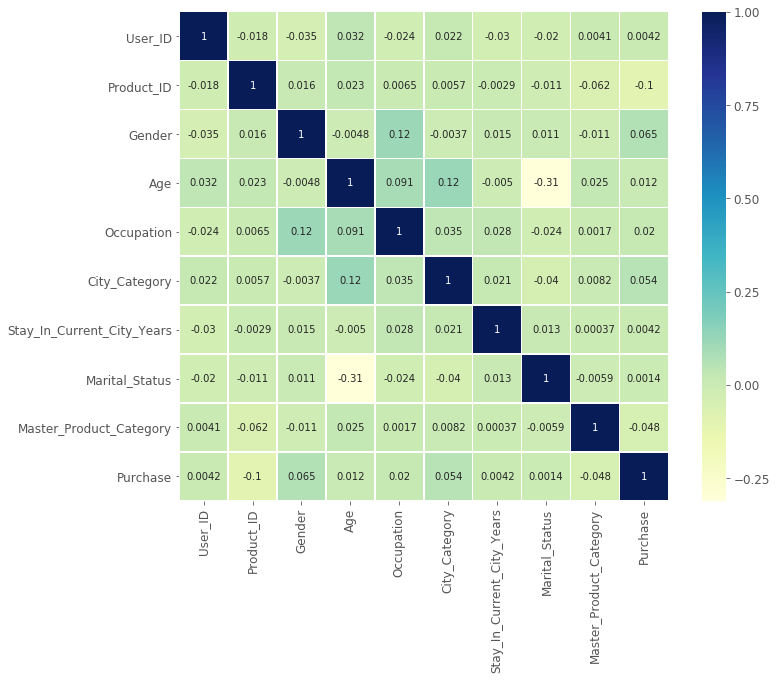

In [45]:
# Obtain correlation matrix from the dataset
corrmat = dataset_cat.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, cmap="YlGnBu", square=True,linewidths=.5, annot=True)
plt.show()

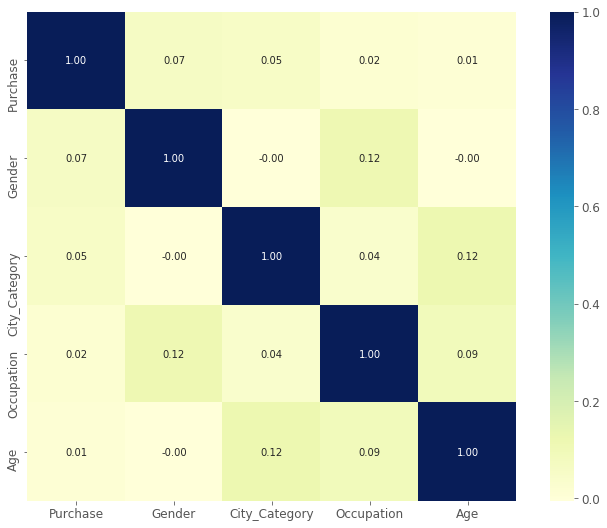

In [46]:
# Obtaining top 5 parameters columns which affects the Purchase the most
k= 5
# Replotting the heatmap with the above data
cols = corrmat.nlargest(k, 'Purchase')['Purchase'].index
cm = np.corrcoef(dataset_cat[cols].values.T)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(cm, cmap="YlGnBu", cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

__Modifiying categorical variable__ <br>
Combining cateogrical variables to obtain good number of counts of categorical varaibles.

__Combining Age ranges__

In [51]:
# combining age range to get good count in each range
dataset['Modified_Age'] = dataset[['Age']]


# Modify Age Range to obtain obtain good number of counts in each range
dataset['Modified_Age'] =dataset['Modified_Age']. map({'0-17':'0-25','18-25':'0-25',
                                                       '46-50':'46-55+','51-55':'46-55+','55+':'46-55+',
                                                      '26-35':'26-35','36-45':'36-45'})
dataset['Modified_Age'].value_counts()

26-35     313015
0-25      163287
36-45     156724
46-55+    150641
Name: Modified_Age, dtype: int64

__One Hot encoding of variables__

In [55]:
dataset.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status',
       'Master_Product_Category', 'Purchase', 'source', 'Gender_MaritalStatus',
       'Modified_Age'],
      dtype='object')

In [56]:
# Categorical variables
dataset[['Occupation','City_Category','Stay_In_Current_City_Years','Gender_MaritalStatus','Modified_Age']].head()

,Occupation,City_Category,Stay_In_Current_City_Years,Gender_MaritalStatus,Modified_Age
0,10,A,2,Female_Un-Married,0-25
1,10,A,2,Female_Un-Married,0-25
2,10,A,2,Female_Un-Married,0-25
3,10,A,2,Female_Un-Married,0-25
4,16,C,4,Male_Un-Married,46-55+


In [59]:
# Feature Encoding categorical columns to visualize correlation of parameters with Purchase column
# Importing required package
from sklearn.preprocessing import LabelEncoder
encode_x = LabelEncoder()

# Encoding categorical columns 
dataset['City_Category'] = encode_x.fit_transform(dataset['City_Category'])
dataset['Gender_MaritalStatus'] = encode_x.fit_transform(dataset['Gender_MaritalStatus'])
dataset['Modified_Age'] = encode_x.fit_transform(dataset['Modified_Age'])

dataset[['Occupation','City_Category','Stay_In_Current_City_Years','Gender_MaritalStatus','Modified_Age']].head()

,Occupation,City_Category,Stay_In_Current_City_Years,Gender_MaritalStatus,Modified_Age
0,10,0,2,1,0
1,10,0,2,1,0
2,10,0,2,1,0
3,10,0,2,1,0
4,16,2,4,3,3


In [60]:
# Creating dummy variables, one for each category of a categorical variable
dataset = pd.get_dummies(dataset, columns=['Occupation', 'City_Category','Stay_In_Current_City_Years', 
                                           'Gender_MaritalStatus','Modified_Age'])

#### Exporting the data

In [65]:
# Drop the columns which have been converted to different types:
dataset.drop(['Age','Gender', 'Marital_Status'],axis=1,inplace=True)

# Splitting the dataset back into test and train datasets for model building:
train = dataset.loc[dataset['source']=="train"]
test = dataset.loc[dataset['source']=="test"]

# Dropping unnecessary columns from train and test dataframe:
test = test.drop(['Purchase','source'],axis=1) # dropping dependent variable 'Purchase' from the test dataset
train = train.drop(['source'],axis=1)

In [66]:
# Exporting csv files as modified versions:
train.to_csv("results/train_modified.csv",index=False)
test.to_csv("results/test_modified.csv",index=False)

### 4. Building the model

In [ ]:
# Mean based:
mean_purhcase = train['Purchase'].mean()

# Defining a dataframe with IDs for submission:
base1 = test[['User_ID','Product_ID']]

# Implying the mean sales value to the Item_Outlet_Sales column
base1.loc[:,'Purchase'] = mean_purhcase

# Exporting the submission file
base1.to_csv("results/algor.csv",index=False)

Function to makes the model, performs cross-validation and generates submission.

## Machine Learning - Build Model

__Assigning Targets, ID Columns and predictors__

In [68]:
# Assigning columns for model building
target = 'Purchase'
IDcol = ['User_ID','Product_ID']

# Excluding Identifiers (used for submission) and dependent variable column
predictors = [x for x in train.columns if x not in [target]+IDcol]


### Linear Regression Model

In [72]:
# setting random seed to obtain same results when the code is re-run anytime
random.seed(123)
# Building a linear regression model 
from sklearn.linear_model import LinearRegression
lin_alg = LinearRegression(normalize=True)

# Importing function to test the model and provide results
from support.mfit import modelfit
import sys, importlib
importlib.reload(sys.modules['support.mfit'])
modelfit(lin_alg, train, test, predictors, target, IDcol)


------Model Report----

RMSE :  4992.114945300622
CV Score Mean : 4990
CV Score Std : 193.9
CV Score Min : 4891
CV Score Max : 5827


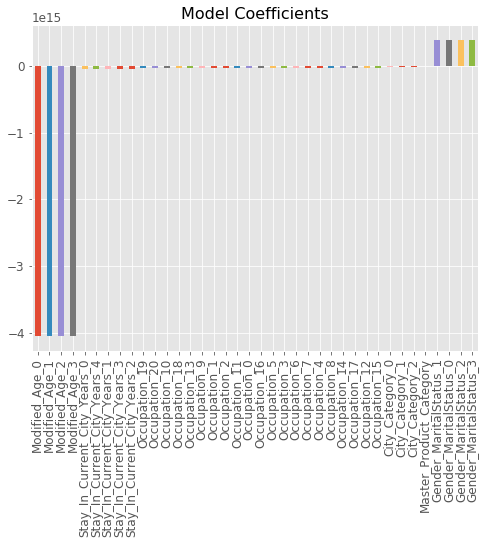

In [76]:
coef1 = pd.Series(alg1.coef_, predictors).sort_values(ascending=True)

plt.figure(figsize=(8,6))
coef1.plot(kind='bar', title='Model Coefficients')
plt.show()

### Ridge Regression Model:

In [78]:
# Building a list of independent varaibles to build the model
from sklearn.linear_model import Ridge

# Building a Ridge regression model 
rdg_alg = Ridge(alpha=0.05,normalize=True)

# Testing the model with the function
modelfit(rdg_alg, train, test, predictors, target, IDcol)


------Model Report----

RMSE :  4992.1368336771175
CV Score Mean : 4990
CV Score Std : 193.3
CV Score Min : 4891
CV Score Max : 5824


### Decision Tree Model

In [79]:
# Building a Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor
dt_alg = DecisionTreeRegressor(max_depth=25, min_samples_leaf=100)

modelfit(dt_alg, train, test, predictors, target, IDcol)


------Model Report----

RMSE :  2887.909556547156
CV Score Mean : 3037
CV Score Std : 456.7
CV Score Min : 2889
CV Score Max : 5025


__Evaluating best parameters by Grid Search__

In [81]:
# Importing required package
from sklearn.model_selection import GridSearchCV

#  DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
params = [{'max_depth':[25,50,75,100],'min_samples_leaf' :[50,100,150,200]}]

# creating a grid seacrch with the above parameters
grid_search = GridSearchCV(estimator = dt_alg, 
                           param_grid = params,
                           scoring = 'neg_mean_squared_error',
                           cv = 20,
                           n_jobs= -1)

In [82]:
# running the grid search function
grid_search.fit(train[predictors], train[target])
# obtaining best accuracies and parameters

best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print ('Best accuracy :', best_accuracy)
print ('Best parameters :', best_parameters)

Best accuracy : -9413531.946061358
Best parameters : {'max_depth': 100, 'min_samples_leaf': 50}


In [83]:
# Building a Decision Tree regression model with the above values
from sklearn.tree import DecisionTreeRegressor
dt_alg2 = DecisionTreeRegressor(max_depth=50, min_samples_leaf=50)

modelfit(dt_alg2, train, test, predictors, target, IDcol)


------Model Report----

RMSE :  2858.1558704945296
CV Score Mean : 3036
CV Score Std : 440.4
CV Score Min : 2892
CV Score Max : 4954


### Random Forest Model

In [84]:
from sklearn.ensemble import RandomForestRegressor
rf_alg = RandomForestRegressor(n_estimators=50,max_depth=25, min_samples_leaf=50,n_jobs=1)
modelfit(rf_alg, train, test, predictors, target, IDcol)


------Model Report----

RMSE :  2859.437041240288
CV Score Mean : 3017
CV Score Std : 451.4
CV Score Min : 2873
CV Score Max : 4982


In [85]:
# Making a random forest model with just **top 2** variables based on the above coeffecient values
predictors2 = ['Master_Product_Category','City_Category_2']
modelfit(rf_alg, train, test, predictors2, target, IDcol)


------Model Report----

RMSE :  2925.306296522835
CV Score Mean : 3042
CV Score Std : 457.7
CV Score Min : 2902
CV Score Max : 5036


### Conclusion

 - Based on the accuracy score and the RMSE score of the models, exporting prediction values using the best trained model.
 - RMSE score for Decision tree algorithm is observed to be minimal
 

In [86]:
modelfit(dt_alg2, train, test, predictors, target, IDcol,'results/algor_final.csv')


------Model Report----

RMSE :  2925.203072928926
CV Score Mean : 3041
CV Score Std : 452.7
CV Score Min : 2902
CV Score Max : 5013
